In [14]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torch.nn.functional as F


In [15]:
#get dataset
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())


Files already downloaded and verified


In [16]:
#if available, use gpu
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
print("Device: ", device)

Device:  cuda


In [17]:
batch_size = 128
validation_size = 5000
train_size = len(dataset) - validation_size

train_dataset, validation_dataset = random_split(dataset, [train_size, validation_size])


In [18]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size*2, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size*2, shuffle=False, num_workers=2)

## Base Model

In [19]:
#define neural network
class BaseModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(3*32*32, 256)
    self.linear2 = nn.Linear(256, 128)
    self.linear3 = nn.Linear(128, 10)

  def forward(self, x):
    x = x.view(x.size(0), -1)
    x = self.linear1(x)
    x = F.relu(x)
    x = self.linear2(x)
    x = F.relu(x)
    x = self.linear3(x)
    return x

In [20]:
model = BaseModel()
print(model)
num_epochs = 25
num_classes = 10

model = BaseModel().to(device)
#loss function and optimizers
criterion = nn.CrossEntropyLoss()
optimizer_adam = torch.optim.Adam(model.parameters(),lr = 0.001)
optimizer_sgd = torch.optim.SGD(model.parameters(),lr = 0.001, momentum=0.9)

BaseModel(
  (linear1): Linear(in_features=3072, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=10, bias=True)
)


## Training Base Model with Adam Optimizer

In [29]:
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):
    train_loss = 0.0
    valid_loss = 0.0

    model.train()
    for data, target in train_loader:

        data = data.to(device)
        target = target.to(device)

        optimizer_adam.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer_adam.step()
        train_loss += loss.item() * data.size(0)

    model.eval()
    for data, target in validation_loader:

        data = data.to(device)
        target = target.to(device)

        output = model(data)

        loss = criterion(output, target)

        valid_loss += loss.item() * data.size(0)

    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(validation_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

Epoch: 1 	Training Loss: 1.177166 	Validation Loss: 1.496940
Epoch: 2 	Training Loss: 1.160314 	Validation Loss: 1.454016
Epoch: 3 	Training Loss: 1.144090 	Validation Loss: 1.445431
Epoch: 4 	Training Loss: 1.134878 	Validation Loss: 1.500752
Epoch: 5 	Training Loss: 1.134193 	Validation Loss: 1.480674
Epoch: 6 	Training Loss: 1.123595 	Validation Loss: 1.501235
Epoch: 7 	Training Loss: 1.116957 	Validation Loss: 1.494431
Epoch: 8 	Training Loss: 1.105624 	Validation Loss: 1.472463
Epoch: 9 	Training Loss: 1.097935 	Validation Loss: 1.463676
Epoch: 10 	Training Loss: 1.101940 	Validation Loss: 1.455677
Epoch: 11 	Training Loss: 1.081470 	Validation Loss: 1.475838
Epoch: 12 	Training Loss: 1.073769 	Validation Loss: 1.478480
Epoch: 13 	Training Loss: 1.076881 	Validation Loss: 1.509173
Epoch: 14 	Training Loss: 1.060468 	Validation Loss: 1.493170
Epoch: 15 	Training Loss: 1.060204 	Validation Loss: 1.491200
Epoch: 16 	Training Loss: 1.051111 	Validation Loss: 1.460067
Epoch: 17 	Traini

In [30]:
accuracy_base_model_adam= []

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        accuracy_base_model_adam.append(round(100*correct/total, 2))
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))


Test Accuracy of the model: 50.5 %


## Training Base Model with SGD Optimizer

In [31]:
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):
    train_loss = 0.0
    valid_loss = 0.0

    model.train()
    for data, target in train_loader:

        data = data.to(device)
        target = target.to(device)

        optimizer_sgd.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer_sgd.step()
        train_loss += loss.item() * data.size(0)

    model.eval()
    for data, target in validation_loader:

        data = data.to(device)
        target = target.to(device)

        output = model(data)

        loss = criterion(output, target)

        valid_loss += loss.item() * data.size(0)

    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(validation_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

Epoch: 1 	Training Loss: 0.892813 	Validation Loss: 1.474454
Epoch: 2 	Training Loss: 0.873046 	Validation Loss: 1.482133
Epoch: 3 	Training Loss: 0.868218 	Validation Loss: 1.487214
Epoch: 4 	Training Loss: 0.865710 	Validation Loss: 1.496456
Epoch: 5 	Training Loss: 0.862608 	Validation Loss: 1.494166
Epoch: 6 	Training Loss: 0.860298 	Validation Loss: 1.501786
Epoch: 7 	Training Loss: 0.858429 	Validation Loss: 1.501992
Epoch: 8 	Training Loss: 0.856373 	Validation Loss: 1.502114
Epoch: 9 	Training Loss: 0.854855 	Validation Loss: 1.513522
Epoch: 10 	Training Loss: 0.852545 	Validation Loss: 1.513312
Epoch: 11 	Training Loss: 0.851197 	Validation Loss: 1.518543
Epoch: 12 	Training Loss: 0.849819 	Validation Loss: 1.522509
Epoch: 13 	Training Loss: 0.848376 	Validation Loss: 1.523100
Epoch: 14 	Training Loss: 0.847493 	Validation Loss: 1.529848
Epoch: 15 	Training Loss: 0.846536 	Validation Loss: 1.531503
Epoch: 16 	Training Loss: 0.845020 	Validation Loss: 1.531150
Epoch: 17 	Traini

In [32]:
accuracy_base_model_sgd = []

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        accuracy_base_model_sgd.append(round(100*correct/total, 2))
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))


Test Accuracy of the model: 52.61 %


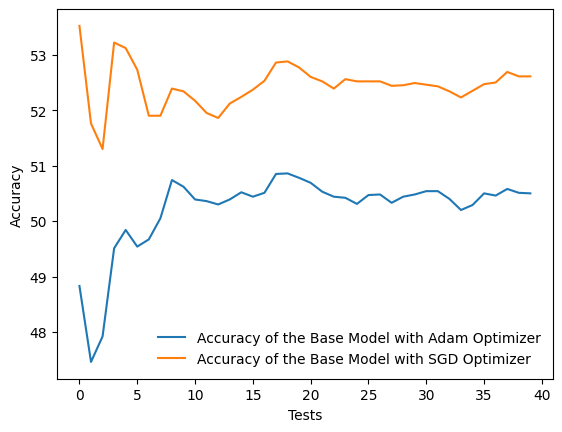

In [33]:
plt.plot(accuracy_base_model_adam, label = "Accuracy of the Base Model with Adam Optimizer")
plt.plot(accuracy_base_model_sgd, label = "Accuracy of the Base Model with SGD Optimizer")
plt.xlabel("Tests")
plt.ylabel("Accuracy")
plt.legend(frameon=False)

## Improved Model

In [34]:

class CIFAR10Classification(nn.Module):
  def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
      self.dropout1 = nn.Dropout2d(0.2)
      self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
      self.pool = nn.MaxPool2d(2, 2)
      self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
      self.flatten = nn.Flatten()
      self.fc1 = nn.Linear(64 * 16 * 16, 512)
      self.dropout2 = nn.Dropout(0.2)
      self.fc2 = nn.Linear(512, 256)
      self.dropout3 = nn.Dropout(0.2)
      self.fc3 = nn.Linear(256, 10)


  def forward(self, x):
      x = self.conv1(x)
      x = F.relu(x)
      x = self.dropout1(x)
      x = self.conv2(x)
      x = F.relu(x)
      x = self.pool(x)
      x = self.conv3(x)
      x = F.relu(x)
      x = self.flatten(x)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.dropout2(x)
      x = self.fc2(x)
      x = F.relu(x)
      x = self.dropout3(x)
      x = self.fc3(x)
      x = F.softmax(x, dim=1)
      return x


In [35]:
model = CIFAR10Classification()
print(model)
num_epochs = 25
num_classes = 10


CIFAR10Classification(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout1): Dropout2d(p=0.2, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=16384, out_features=512, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [36]:
model = CIFAR10Classification().to(device)
criterion = nn.CrossEntropyLoss()
optimizer_adam = torch.optim.Adam(model.parameters(),lr = 0.001)
optimizer_sgd = torch.optim.SGD(model.parameters(),lr = 0.001, momentum=0.9)

# Training Improved Model with Adam Optimizer

In [37]:
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):
    train_loss = 0.0
    valid_loss = 0.0

    model.train()
    for data, target in train_loader:

        data = data.to(device)
        target = target.to(device)

        optimizer_adam.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer_adam.step()
        train_loss += loss.item() * data.size(0)

    model.eval()
    for data, target in validation_loader:

        data = data.to(device)
        target = target.to(device)

        output = model(data)

        loss = criterion(output, target)

        valid_loss += loss.item() * data.size(0)

    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(validation_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

Epoch: 1 	Training Loss: 2.142964 	Validation Loss: 2.032359
Epoch: 2 	Training Loss: 2.032384 	Validation Loss: 1.979597
Epoch: 3 	Training Loss: 1.974502 	Validation Loss: 1.939368
Epoch: 4 	Training Loss: 1.927768 	Validation Loss: 1.935605
Epoch: 5 	Training Loss: 1.894691 	Validation Loss: 1.879708
Epoch: 6 	Training Loss: 1.873060 	Validation Loss: 1.882351
Epoch: 7 	Training Loss: 1.845544 	Validation Loss: 1.857072
Epoch: 8 	Training Loss: 1.830078 	Validation Loss: 1.840618
Epoch: 9 	Training Loss: 1.817939 	Validation Loss: 1.830727
Epoch: 10 	Training Loss: 1.796981 	Validation Loss: 1.819516
Epoch: 11 	Training Loss: 1.782346 	Validation Loss: 1.824906
Epoch: 12 	Training Loss: 1.769391 	Validation Loss: 1.817097
Epoch: 13 	Training Loss: 1.755124 	Validation Loss: 1.815110
Epoch: 14 	Training Loss: 1.748840 	Validation Loss: 1.808815
Epoch: 15 	Training Loss: 1.735474 	Validation Loss: 1.805974
Epoch: 16 	Training Loss: 1.732300 	Validation Loss: 1.807069
Epoch: 17 	Traini

In [38]:
accuracy_improved_model_adam = []
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        accuracy_improved_model_adam.append(round(100*correct/total, 2))


    print('Test Accuracy of the model: {} %'.format(100 * correct / total))


Test Accuracy of the model: 65.24 %


# Training Improved Model with Adam Optimizer

In [39]:
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):
    train_loss = 0.0
    valid_loss = 0.0

    model.train()
    for data, target in train_loader:
        data = data.to(device)
        target = target.to(device)
        optimizer_sgd.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer_sgd.step()
        train_loss += loss.item() * data.size(0)

    model.eval()
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item() * data.size(0)

    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(validation_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

Epoch: 1 	Training Loss: 1.662629 	Validation Loss: 1.785285
Epoch: 2 	Training Loss: 1.651867 	Validation Loss: 1.789932
Epoch: 3 	Training Loss: 1.650519 	Validation Loss: 1.782142
Epoch: 4 	Training Loss: 1.649038 	Validation Loss: 1.778724
Epoch: 5 	Training Loss: 1.648288 	Validation Loss: 1.778479
Epoch: 6 	Training Loss: 1.648367 	Validation Loss: 1.780153
Epoch: 7 	Training Loss: 1.647385 	Validation Loss: 1.776617
Epoch: 8 	Training Loss: 1.645389 	Validation Loss: 1.777750
Epoch: 9 	Training Loss: 1.642122 	Validation Loss: 1.775609
Epoch: 10 	Training Loss: 1.641760 	Validation Loss: 1.778166
Epoch: 11 	Training Loss: 1.642681 	Validation Loss: 1.775566
Epoch: 12 	Training Loss: 1.640026 	Validation Loss: 1.775513
Epoch: 13 	Training Loss: 1.641386 	Validation Loss: 1.775213
Epoch: 14 	Training Loss: 1.642444 	Validation Loss: 1.778438
Epoch: 15 	Training Loss: 1.640340 	Validation Loss: 1.776371
Epoch: 16 	Training Loss: 1.639569 	Validation Loss: 1.774374
Epoch: 17 	Traini

In [40]:
accuracy_improved_model_sgd = []
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        accuracy_improved_model_sgd.append(round(100*correct/total, 2))


    print('Test Accuracy of the model: {} %'.format(100 * correct / total))


Test Accuracy of the model: 69.45 %


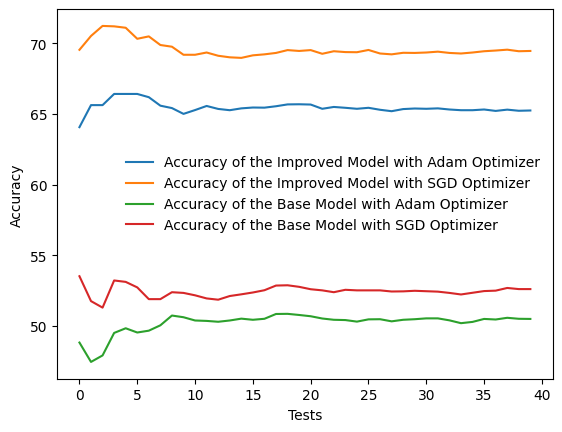

In [42]:
plt.plot(accuracy_improved_model_adam, label = "Accuracy of the Improved Model with Adam Optimizer")
plt.plot(accuracy_improved_model_sgd, label = "Accuracy of the Improved Model with SGD Optimizer")
plt.plot(accuracy_base_model_adam, label = "Accuracy of the Base Model with Adam Optimizer")
plt.plot(accuracy_base_model_sgd, label = "Accuracy of the Base Model with SGD Optimizer")
plt.xlabel("Tests")
plt.ylabel("Accuracy")
plt.legend(frameon=False)